In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print("*"* 30)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
******************************
(10000, 28, 28)
(10000,)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_labels = ["T-Shirt/top","trouser","pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [10]:
class_labels

['T-Shirt/top',
 'trouser',
 'pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

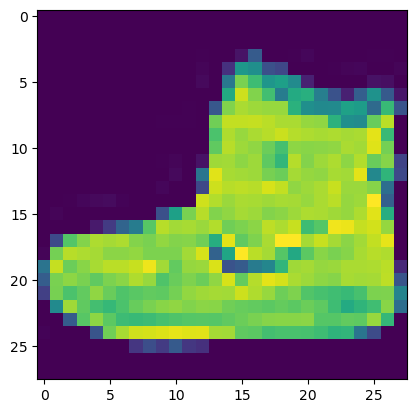

In [11]:
plt.imshow(x_train[0])

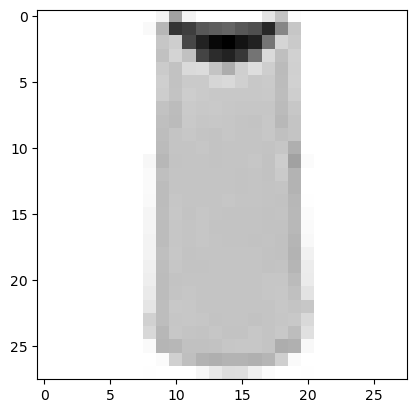

In [18]:
plt.imshow(x_train[2],cmap="Greys")

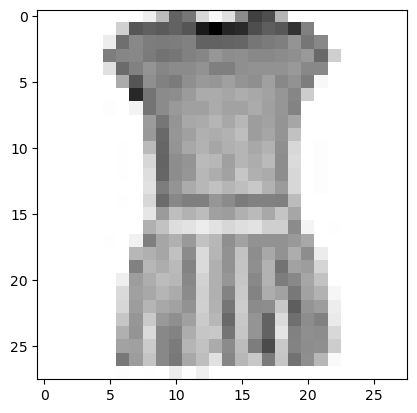

In [20]:
plt.imshow(x_train[3],cmap="Greys")

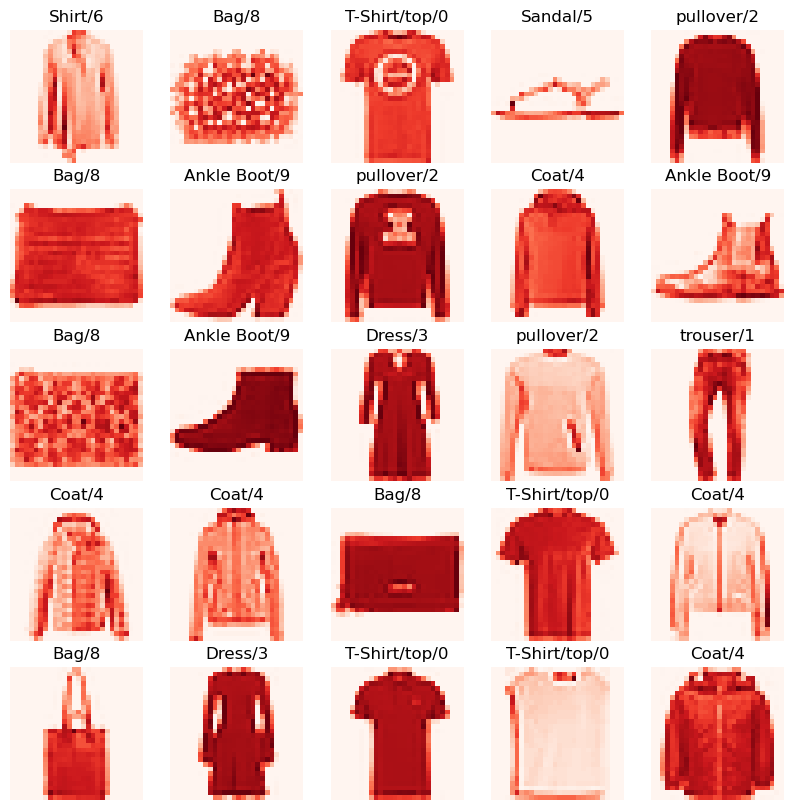

In [21]:
plt.figure(figsize=(10,10))
j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(x_train[i],cmap = "Reds")
    plt.axis("off")
    plt.title("{}/{}".format(class_labels[y_train[i]],y_train[i]))

In [23]:
x_train.ndim

3

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [28]:
x_train.ndim

4

In [29]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Feature Scaling


In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Splitting the datasets

In [32]:
x_train,x_val,y_train,y_val = train_test_split(
                                                x_train, 
                                                y_train,
                                                random_state =42,
                                                test_size =0.2
)

In [33]:
x_train.shape

(48000, 28, 28, 1)

In [34]:
x_val.shape

(12000, 28, 28, 1)

# Model building Convolution neural network

In [35]:
model = keras.models.Sequential([keras.layers.Conv2D(filters = 32,kernel_size =3,strides = (1,1),padding = "valid",activation ="relu",input_shape = [28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Conv2D(filters = 12,kernel_size =3,strides = (1,1),padding = "valid",activation ="relu"),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units = 128,activation="relu"),   
                                 keras.layers.Dense(units = 50,activation="relu"),
                                 keras.layers.Dense(units =10,activation = "softmax")
                                                     ])                 

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 12)        3468      
                                                                 
 flatten (Flatten)           (None, 1452)              0         
                                                                 
 dense (Dense)               (None, 128)               185984    
                                                                 
 dense_1 (Dense)             (None, 50)                6450      
                                                        

# Compile

In [37]:
model.compile( 
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics =["accuracy"]
)

In [38]:
model.fit(
           x_train,
           y_train,
           epochs = 30,
           batch_size = 512,
           verbose =True,
           validation_data = (x_val,y_val))

Epoch 1/30
94/94 [==============================] - 16s 154ms/step - loss: 0.8095 - accuracy: 0.7079 - val_loss: 0.5068 - val_accuracy: 0.8175
Epoch 2/30
94/94 [==============================] - 14s 150ms/step - loss: 0.4452 - accuracy: 0.8416 - val_loss: 0.4084 - val_accuracy: 0.8527
Epoch 3/30
94/94 [==============================] - 14s 149ms/step - loss: 0.3834 - accuracy: 0.8647 - val_loss: 0.3802 - val_accuracy: 0.8612
Epoch 4/30
94/94 [==============================] - 14s 147ms/step - loss: 0.3511 - accuracy: 0.8740 - val_loss: 0.3513 - val_accuracy: 0.8733
Epoch 5/30
94/94 [==============================] - 14s 148ms/step - loss: 0.3305 - accuracy: 0.8814 - val_loss: 0.3356 - val_accuracy: 0.8799
Epoch 6/30
94/94 [==============================] - 14s 150ms/step - loss: 0.3120 - accuracy: 0.8884 - val_loss: 0.3347 - val_accuracy: 0.8766
Epoch 7/30
94/94 [==============================] - 14s 151ms/step - loss: 0.2934 - accuracy: 0.8940 - val_loss: 0.3038 - val_accuracy: 0.8888

# Testing the model accuracy on the testing data


In [40]:
# model.predict(x_test[0])     it gives an error because of dimentuions 

In [42]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis = 0))).round(2)

1/1 [==============================] - 0s 128ms/step


9

In [43]:
y_test[0]

9

In [44]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.42, 0.  , 0.  ]], dtype=float32)

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2821 - accuracy: 0.9098


[0.28208690881729126, 0.9097999930381775]

# Plotting the confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

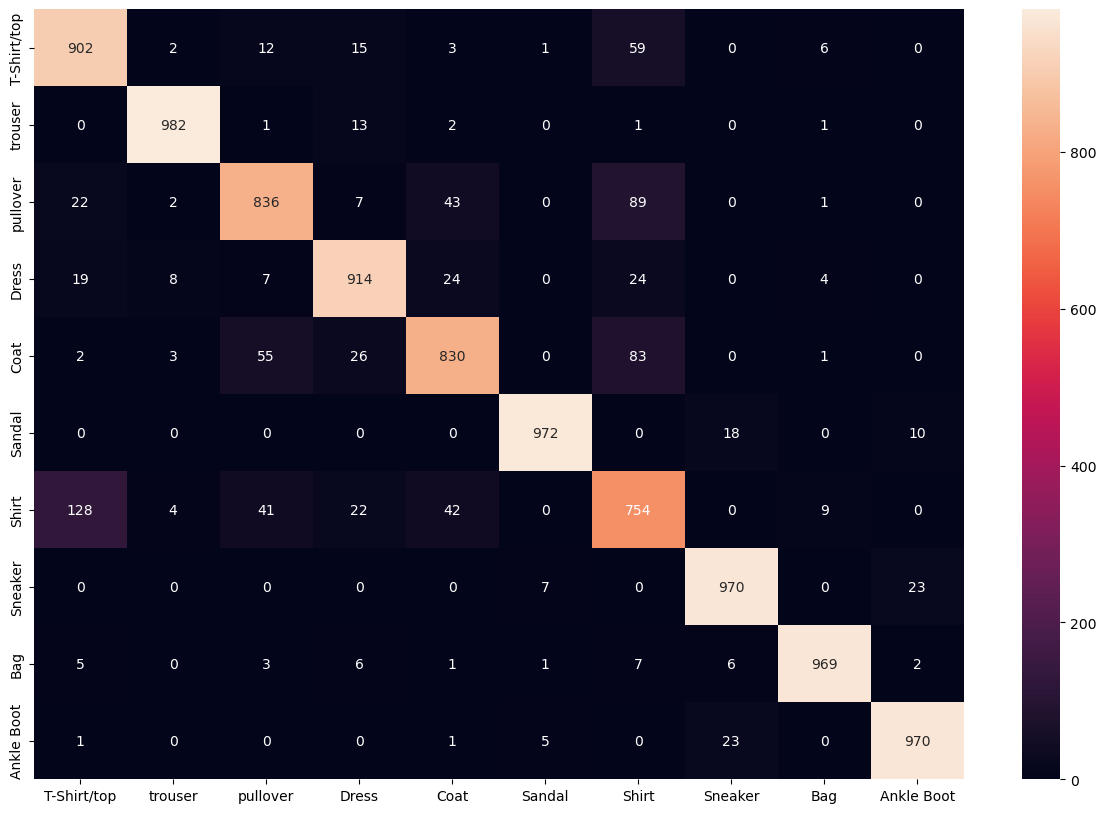

In [48]:
plt.figure(figsize=(15,10))

y_pred_lables = [np.argmax(label) for label in y_pred]
cnf = confusion_matrix(y_test,y_pred_lables)

sb.heatmap(cnf,annot = True,fmt = "d",xticklabels = class_labels,yticklabels =class_labels)

In [49]:
from sklearn.metrics import classification_report

In [50]:
clf =classification_report(y_test,y_pred_lables,target_names=class_labels)

In [51]:
print(clf)

              precision    recall  f1-score   support

 T-Shirt/top       0.84      0.90      0.87      1000
     trouser       0.98      0.98      0.98      1000
    pullover       0.88      0.84      0.86      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.88      0.83      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.75      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

